## Using Vehicle Fuel Economy dataset from Kaggle

In [2]:
#importing pacakages
import pandas as pd

### Reading Dataset and Exploring data

In [3]:
#Reading the Dataset
dfData=pd.read_csv('Data\database.csv',low_memory=False)

In [4]:
dfData.head(5)

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,...,Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),Range (FT2),City Range (FT2),Highway Range (FT2)
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0


In [5]:
dfData.columns

Index(['Vehicle ID', 'Year', 'Make', 'Model', 'Class', 'Drive', 'Transmission',
       'Transmission Descriptor', 'Engine Index', 'Engine Descriptor',
       'Engine Cylinders', 'Engine Displacement', 'Turbocharger',
       'Supercharger', 'Fuel Type', 'Fuel Type 1', 'Fuel Type 2',
       'City MPG (FT1)', 'Unrounded City MPG (FT1)', 'City MPG (FT2)',
       'Unrounded City MPG (FT2)', 'City Gasoline Consumption (CD)',
       'City Electricity Consumption', 'City Utility Factor',
       'Highway MPG (FT1)', 'Unrounded Highway MPG (FT1)', 'Highway MPG (FT2)',
       'Unrounded Highway MPG (FT2)', 'Highway Gasoline Consumption (CD)',
       'Highway Electricity Consumption', 'Highway Utility Factor',
       'Unadjusted City MPG (FT1)', 'Unadjusted Highway MPG (FT1)',
       'Unadjusted City MPG (FT2)', 'Unadjusted Highway MPG (FT2)',
       'Combined MPG (FT1)', 'Unrounded Combined MPG (FT1)',
       'Combined MPG (FT2)', 'Unrounded Combined MPG (FT2)',
       'Combined Electricity Consu

In [6]:
#Only selecting columns that are needed for this analysis
liSelectedColumns=['Year','Make','Class','Transmission','Fuel Type 1','City MPG (FT1)','Highway MPG (FT1)','Gasoline/Electricity Blended (CD)']
dfSelData=dfData[liSelectedColumns].copy()
dfSelData.head(5)

,Year,Make,Class,Transmission,Fuel Type 1,City MPG (FT1),Highway MPG (FT1),Gasoline/Electricity Blended (CD)
0,1984,Alfa Romeo,Minicompact Cars,Manual 5-Speed,Regular Gasoline,17,24,False
1,1984,Alfa Romeo,Minicompact Cars,Manual 5-Speed,Regular Gasoline,17,24,False
2,1984,Alfa Romeo,Two Seaters,Manual 5-Speed,Regular Gasoline,18,25,False
3,1984,Alfa Romeo,Two Seaters,Manual 5-Speed,Regular Gasoline,18,25,False
4,1984,AM General,Special Purpose Vehicle 2WD,Automatic 3-Speed,Regular Gasoline,18,17,False


In [7]:
#Since we are only interested in gasoline vehicles, let's filter for that
dfSelData=dfSelData[dfSelData['Gasoline/Electricity Blended (CD)']==False]
del dfSelData['Gasoline/Electricity Blended (CD)']
dfSelData=dfSelData[dfSelData['Fuel Type 1'].str.contains("Gasoline")]

In [8]:
dfMissingData=dfSelData[dfSelData.Transmission.isnull()]
len(dfMissingData)
#Only 2 missing data points can eliminate
dfSelData=dfSelData[~dfSelData.Transmission.isnull()]
len(dfSelData)

36859

In [9]:
#Classifying as Automatic or Manual
dfSelData.Transmission.unique()

array(['Manual 5-Speed', 'Automatic 3-Speed', 'Manual 4-Speed',
       'Automatic 4-Speed', 'Manual 3-Speed', 'Manual 4-Speed Doubled',
       'Automatic (S4)', 'Manual 5 Speed', 'Manual 6-Speed',
       'Automatic (variable gear ratios)', 'Automatic 5-Speed',
       'Automatic (S5)', 'Auto(L4)', 'Auto(L3)', 'Automatic 6-Speed',
       'Automatic (S6)', 'Automatic 7-Speed', 'Automatic (S7)',
       'Automatic (S8)', 'Automatic (AV)', 'Auto(AM7)', 'Automatic (AM5)',
       'Auto(AM6)', 'Automatic (AM6)', 'Automatic (A6)', 'Auto(AV-S7)',
       'Manual 7-Speed', 'Auto (AV-S6)', 'Auto (AV-S8)',
       'Automatic (AV-S6)', 'Auto(AV-S6)', 'Auto(AM5)', 'Auto (AV)',
       'Auto(AV-S8)', 'Automatic 8-Speed', 'Automatic (A1)',
       'Auto(AM-S6)', 'Auto(AM-S7)', 'Automatic 6Speed',
       'Automatic 9-Speed', 'Automatic (S9)', 'Auto(AM8)', 'Auto(AM-S8)',
       'Manual(M7)', 'Auto(AM-S9)', 'Automatic (S10)'], dtype=object)

In [10]:
#Multiple transmission types
#Encoding it down to the two major types to keep model simple
dfSelData['Transmission_Type']=dfSelData['Transmission'].apply(lambda x: 'Manual' if 'Manual' in x else 'Automatic')

In [11]:
#The transmission encoding key
dfTransmissionCheck=dfSelData[['Transmission','Transmission_Type']]
dfTransmissionCheck=dfTransmissionCheck.drop_duplicates()
dfTransmissionCheck

,Transmission,Transmission_Type
0,Manual 5-Speed,Manual
4,Automatic 3-Speed,Automatic
10,Manual 4-Speed,Manual
60,Automatic 4-Speed,Automatic
193,Manual 3-Speed,Manual
568,Manual 4-Speed Doubled,Manual
4829,Automatic (S4),Automatic
4855,Manual 5 Speed,Manual
7398,Manual 6-Speed,Manual
8252,Automatic (variable gear ratios),Automatic


In [12]:
#Cleaning Up column class to a manageable level
dictClassMap={'Minicompact Cars':'Car',
'Two Seaters':'Car',
'Special Purpose Vehicle 2WD':'SPV',
'Special Purpose Vehicle 4WD':'SPV',
'Subcompact Cars':'Car',
'Midsize Cars':'Car',
'Midsize Station Wagons':'Car',
'Compact Cars':'Car',
'Midsize-Large Station Wagons':'Car',
'Large Cars':'Car',
'Small Station Wagons':'Car',
'Standard Pickup Trucks 2WD':'Truck',
'Vans, Passenger Type':'Van',
'Vans, Cargo Type':'Van',
'Standard Pickup Trucks 4WD':'Truck',
'Special Purpose Vehicles':'SPV',
'Small Pickup Trucks 2WD':'Truck',
'Small Pickup Trucks 4WD':'Truck',
'Vans':'Van',
'Standard Pickup Trucks':'Truck',
'Small Pickup Trucks':'Truck',
'Vans Passenger':'Van',
'Standard Pickup Trucks/2wd':'Truck',
'Special Purpose Vehicles/2wd':'SPV',
'Special Purpose Vehicles/4wd':'SPV',
'Sport Utility Vehicle - 4WD':'SUV',
'Sport Utility Vehicle - 2WD':'SUV',
'Minivan - 2WD':'Van',
'Minivan - 4WD':'Van',
'Small Sport Utility Vehicle 4WD':'SUV',
'Small Sport Utility Vehicle 2WD':'SUV',
'Standard Sport Utility Vehicle 4WD':'SUV',
'Standard Sport Utility Vehicle 2WD':'SUV'}

dfSelData['Class_Type'] = dfSelData['Class'].map(dictClassMap)

In [13]:
#Dont need the transmission and class columns anymore
dfSelData = dfSelData.drop(['Transmission','Class'], 1)

#Data cleaning up done
dfCleansedData=dfSelData.copy()


### Exploring the cleansed dataset

In [14]:
dfCleansedData.head(5)

,Year,Make,Fuel Type 1,City MPG (FT1),Highway MPG (FT1),Transmission_Type,Class_Type
0,1984,Alfa Romeo,Regular Gasoline,17,24,Manual,Car
1,1984,Alfa Romeo,Regular Gasoline,17,24,Manual,Car
2,1984,Alfa Romeo,Regular Gasoline,18,25,Manual,Car
3,1984,Alfa Romeo,Regular Gasoline,18,25,Manual,Car
4,1984,AM General,Regular Gasoline,18,17,Automatic,SPV


In [15]:
#Getting average fuel economy over the years
dfAvgFuelEconomyCityYOY=dfCleansedData.groupby(['Year'])['City MPG (FT1)'].mean().reset_index()
dfAvgFuelEconomyHighwayYOY=dfCleansedData.groupby(['Year'])['Highway MPG (FT1)'].mean().reset_index()
dfAvgFuelEconomyYOY=dfAvgFuelEconomyCityYOY.merge(dfAvgFuelEconomyHighwayYOY,how="left",on=['Year'])

In [16]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


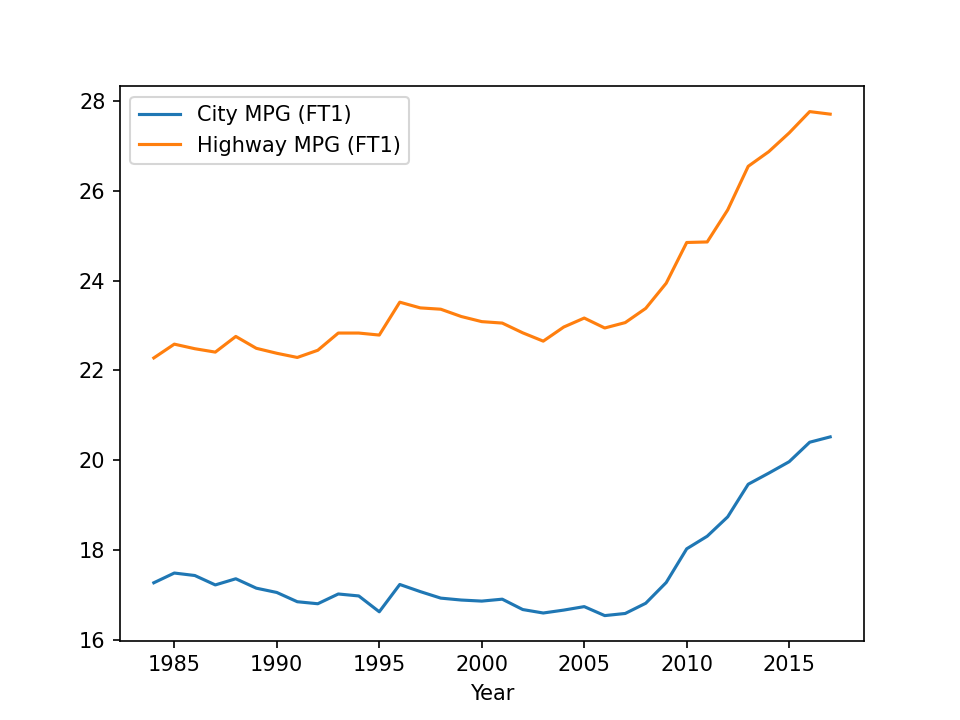

<AxesSubplot:xlabel='Year'>

In [17]:
dfAvgFuelEconomyYOY.plot(x='Year',y=['City MPG (FT1)','Highway MPG (FT1)'])

<IPython.core.display.Javascript object>


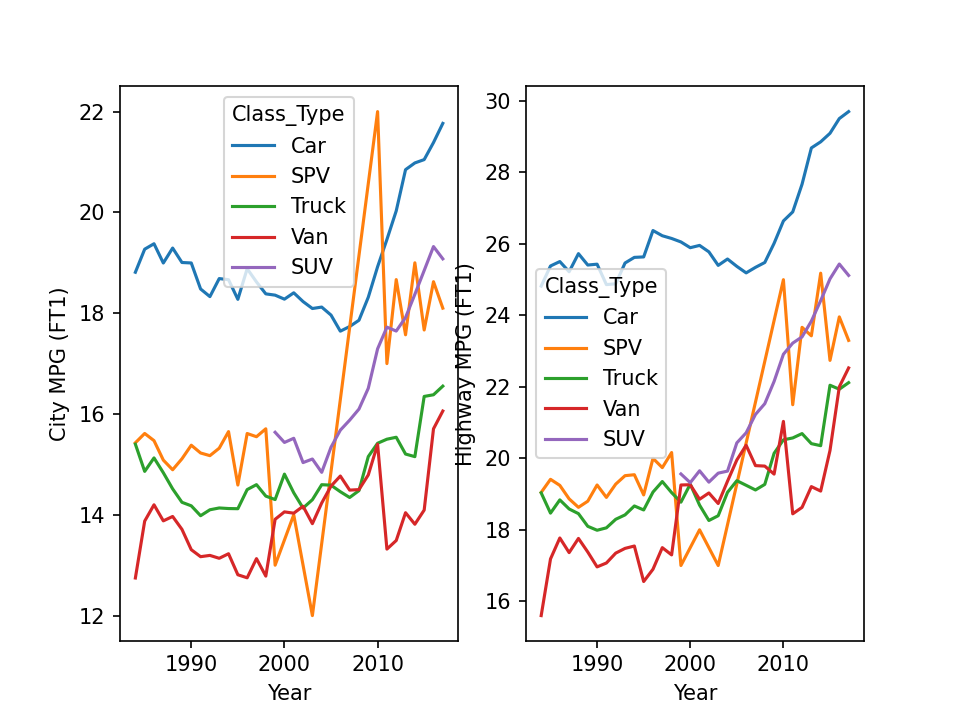

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [18]:
#Identifying fuel economy based on class
#Getting average fuel economy over the years
import seaborn as sns
dfAvgFuelEconomyCityClassYOY=dfCleansedData.groupby(['Year','Class_Type'])['City MPG (FT1)'].mean().reset_index()
dfAvgFuelEconomyHighwayClassYOY=dfCleansedData.groupby(['Year','Class_Type'])['Highway MPG (FT1)'].mean().reset_index()



fig, ax =plt.subplots(1,2)

sns.lineplot('Year', 'City MPG (FT1)', data=dfAvgFuelEconomyCityClassYOY, hue='Class_Type',ax=ax[0])
sns.lineplot('Year', 'Highway MPG (FT1)', data=dfAvgFuelEconomyHighwayClassYOY, hue='Class_Type',ax=ax[1])

fig.show()


<IPython.core.display.Javascript object>


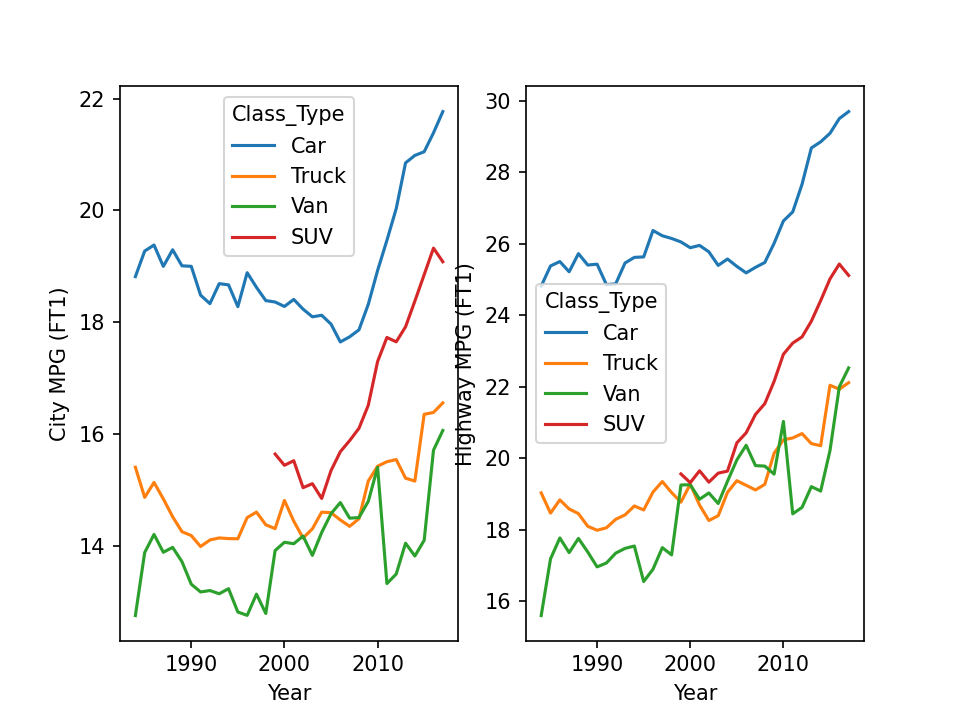

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [19]:
#Seems like Special purpose vehicles are skewing up the results and can be of multiple vehicle class.
#Need to remove Special purpose vehicles
dfCleansedData=dfCleansedData[dfCleansedData.Class_Type!='SPV']

dfAvgFuelEconomyCityClassYOY=dfCleansedData.groupby(['Year','Class_Type'])['City MPG (FT1)'].mean().reset_index()
dfAvgFuelEconomyHighwayClassYOY=dfCleansedData.groupby(['Year','Class_Type'])['Highway MPG (FT1)'].mean().reset_index()



fig, ax =plt.subplots(1,2)

sns.lineplot('Year', 'City MPG (FT1)', data=dfAvgFuelEconomyCityClassYOY, hue='Class_Type',ax=ax[0])
sns.lineplot('Year', 'Highway MPG (FT1)', data=dfAvgFuelEconomyHighwayClassYOY, hue='Class_Type',ax=ax[1])

fig.show()


In [20]:
#Comparing Automatic vs Manual transmission Fuel economy
dfAvgFuelEconomyCityTransmissionYOY=dfCleansedData.groupby(['Year','Transmission_Type'])['City MPG (FT1)'].mean().reset_index()
dfAvgFuelEconomyHighwayTransmissionYOY=dfCleansedData.groupby(['Year','Transmission_Type'])['Highway MPG (FT1)'].mean().reset_index()

In [21]:
dfAvgFuelEconomyCityTransmissionYOY=pd.pivot_table(dfAvgFuelEconomyCityTransmissionYOY, values = 'City MPG (FT1)', index=['Year'], columns = 'Transmission_Type').reset_index()
dfAvgFuelEconomyCityTransmissionYOY.columns=['Year','Automatic City','Manual City']

dfAvgFuelEconomyHighwayTransmissionYOY=pd.pivot_table(dfAvgFuelEconomyHighwayTransmissionYOY, values = 'Highway MPG (FT1)', index=['Year'], columns = 'Transmission_Type').reset_index()
dfAvgFuelEconomyHighwayTransmissionYOY.columns=['Year','Automatic Highway','Manual Highway']

dfAvgFuelEconomyTransmissionYOY=dfAvgFuelEconomyCityTransmissionYOY.merge(dfAvgFuelEconomyHighwayTransmissionYOY,how="left",on=['Year'])

<IPython.core.display.Javascript object>


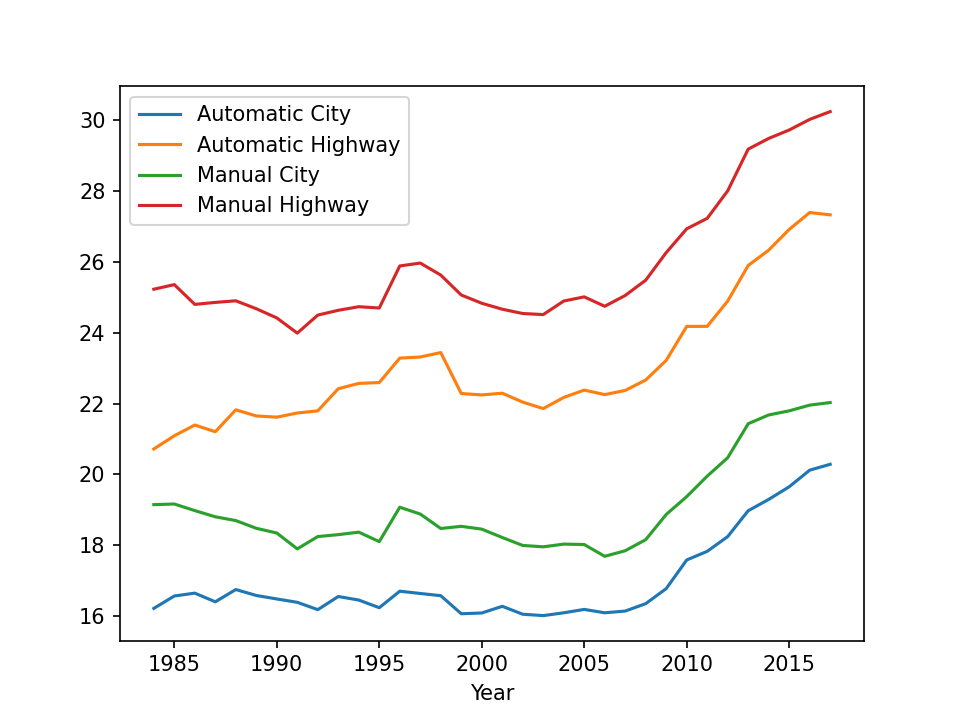

<AxesSubplot:xlabel='Year'>

In [22]:
dfAvgFuelEconomyTransmissionYOY.plot(x='Year',y=['Automatic City','Automatic Highway','Manual City','Manual Highway'])
#Manual better than automatic

In [23]:
dfGasolineTypeEconomy=dfCleansedData.copy()
dfGasolineTypeEconomy['AVG_ECONOMY_MPG']=(dfGasolineTypeEconomy['City MPG (FT1)']+dfGasolineTypeEconomy['Highway MPG (FT1)'])/2
dfGasolineTypeEconomy = dfGasolineTypeEconomy.drop(['City MPG (FT1)','Highway MPG (FT1)'], 1)

In [24]:
dfAvgFuelEconomyGasolineTypeYOY=dfGasolineTypeEconomy.groupby(['Year','Fuel Type 1'])['AVG_ECONOMY_MPG'].mean().reset_index()
dfAvgFuelEconomyGasolineTypeYOY=pd.pivot_table(dfAvgFuelEconomyGasolineTypeYOY, values = 'AVG_ECONOMY_MPG', index=['Year'], columns = 'Fuel Type 1').reset_index()
dfAvgFuelEconomyGasolineTypeYOY.head(5)

Fuel Type 1,Year,Midgrade Gasoline,Premium Gasoline,Regular Gasoline
0,1984,NaN,NaN,20.135753
1,1985,NaN,20.366337,20.390263
2,1986,NaN,19.820000,20.363095
3,1987,NaN,19.668539,20.245578
4,1988,NaN,19.082524,20.593998


<IPython.core.display.Javascript object>


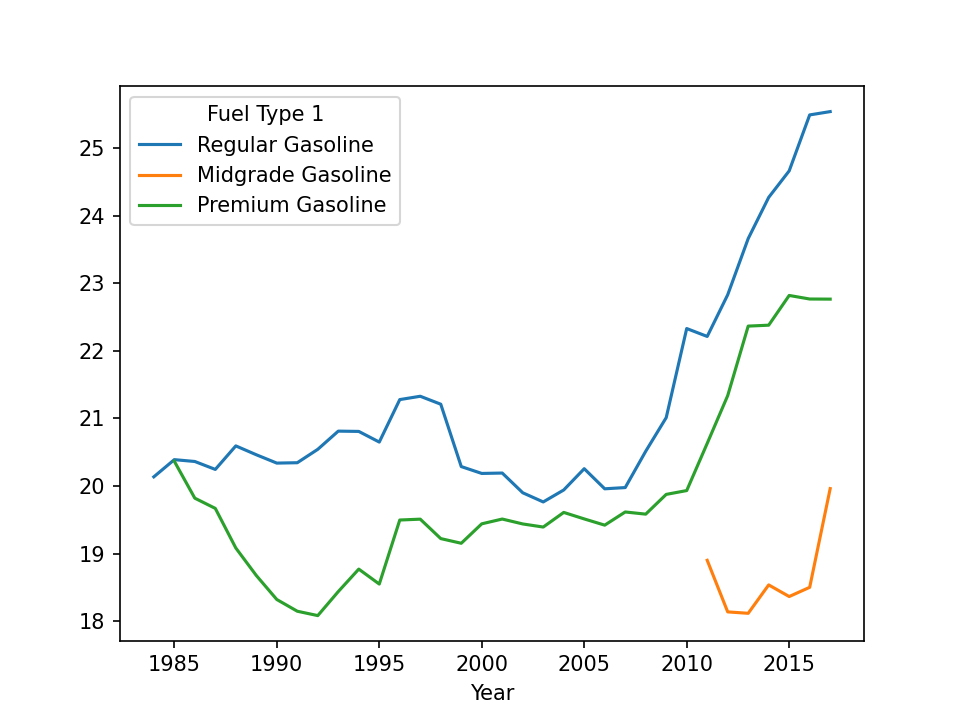

<AxesSubplot:xlabel='Year'>

In [25]:
dfAvgFuelEconomyGasolineTypeYOY.plot(x='Year',y=['Regular Gasoline','Midgrade Gasoline','Premium Gasoline'])
#Regular gasoline seems to have highe mileage. It could be because regular gasoline is being used more frequently in regular cars
#where as premium is being put in luxury and larger vehicles which have lower fuel economy.

## Creating model to predict the fuel economy of a vehicle

In [26]:
dfCleansedData.columns

Index(['Year', 'Make', 'Fuel Type 1', 'City MPG (FT1)', 'Highway MPG (FT1)',
       'Transmission_Type', 'Class_Type'],
      dtype='object')

In [27]:
dfCleansedData['AVG_ECONOMY_MPG']=(dfCleansedData['City MPG (FT1)']+dfCleansedData['Highway MPG (FT1)'])/2

In [28]:
dfModelData=dfCleansedData.copy()
dfModelData=dfModelData.groupby(['Year','Fuel Type 1','Class_Type','Transmission_Type'])['AVG_ECONOMY_MPG'].mean().reset_index()

In [29]:
#Three categorical columns
#Need to convert them to numeric to predict
#Going to use label encoding

#Function to do label encoding
def LabelEncode(dfData,szColName):
    dfEncodeData=dfData[[szColName]]
    dfEncodeData=dfEncodeData.drop_duplicates()
    dfEncodeData=dfEncodeData.reset_index(drop=True).reset_index()
    dfEncodeData=dfEncodeData.rename(columns={'index':'ID'})
    dictEncodeData=dfEncodeData.set_index(szColName)['ID'].to_dict()
    return dictEncodeData

In [30]:
dictFuelType=LabelEncode(dfModelData,'Fuel Type 1')
dictClassType=LabelEncode(dfModelData,'Class_Type')
dictTransType=LabelEncode(dfModelData,'Transmission_Type')

In [31]:
dfModelData['FUEL_TYPE_ID'] = dfModelData['Fuel Type 1'].map(dictFuelType)
dfModelData['CLASS_TYPE_ID'] = dfModelData['Class_Type'].map(dictClassType)
dfModelData['TRANSMISSION_TYPE_ID'] = dfModelData['Transmission_Type'].map(dictTransType)
dfModelData=dfModelData.drop(['Fuel Type 1','Class_Type','Transmission_Type'], axis = 1)
dfModelData.head(5)

,Year,AVG_ECONOMY_MPG,FUEL_TYPE_ID,CLASS_TYPE_ID,TRANSMISSION_TYPE_ID
0,1984,19.898319,0,0,0
1,1984,24.470930,0,0,1
2,1984,15.431034,0,1,0
3,1984,18.538265,0,1,1
4,1984,13.413580,0,2,0


### Modeling Car Economy using Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [33]:
response_col='AVG_ECONOMY_MPG'

#Split into explanatory and response variables
X = dfModelData.drop(response_col, axis=1)
y = dfModelData[response_col]

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=11)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)
print("The R Square for Training data is:"+str(train_score))
print("The R Square for Test data is:"+str(test_score))

The R Square for Training data is:0.4017710757042151
The R Square for Test data is:0.5559180874331718


In [34]:
#Taking a look at the coefficents
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df

,est_int,coefs,abs_coefs
3,TRANSMISSION_TYPE_ID,2.425731,2.425731
1,FUEL_TYPE_ID,-1.588503,1.588503
2,CLASS_TYPE_ID,-1.339057,1.339057
0,Year,0.171021,0.171021


In [35]:
#The transmission type seems to be one of the major factors for economy
#The type of fuel and class seem to impact the economy as well
#The year of the model of vehicle doesnt seem to have much impact on the fule economy

### Predicting the Fuel economy of an user input vehicle.

In [37]:
dictInput=[{'Year':2000,'FUEL_TYPE':'Regular Gasoline','CLASS_TYPE':'Car','TRANSMISSION_TYPE':'Automatic'},
           {'Year':2000,'FUEL_TYPE':'Regular Gasoline','CLASS_TYPE':'SUV','TRANSMISSION_TYPE':'Manual'}
          ]
def GenerateModelInput(dictInput):
    dfX=pd.DataFrame(dictInput)
    dfX['FUEL_TYPE_ID'] = dfX['FUEL_TYPE'].map(dictFuelType)
    dfX['CLASS_TYPE_ID'] = dfX['CLASS_TYPE'].map(dictClassType)
    dfX['TRANSMISSION_TYPE_ID'] = dfX['TRANSMISSION_TYPE'].map(dictTransType)
    dfX=dfX.drop(['FUEL_TYPE','CLASS_TYPE','TRANSMISSION_TYPE'], axis = 1)
    return dfX.values

predMPG=lm_model.predict(GenerateModelInput(dictInput))
for i in range(0,len(predMPG)):
    print("The fuel economy for vehicle"+str(i+1)+" is:"+str(round(predMPG[i],0))+" mpg")

The fuel economy for vehicle1 is:20.0 mpg
The fuel economy for vehicle2 is:19.0 mpg
